In [1]:
# packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
# loading dataset
df_air = pd.read_excel("C:/Users/giese/Desktop/outros_projetos/Projetos-python/air_quality/AirQualityUCI.xlsx")

In [3]:
# first 5 values from dataset
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,NaN,NaN
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,NaN,NaN


In [4]:
# geral information about the data
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Unnamed: 15    0 non-

In [5]:
# Exploratory analysis

<AxesSubplot:title={'center':'Temperature in polluted italy city'}, xlabel='Date', ylabel='T'>

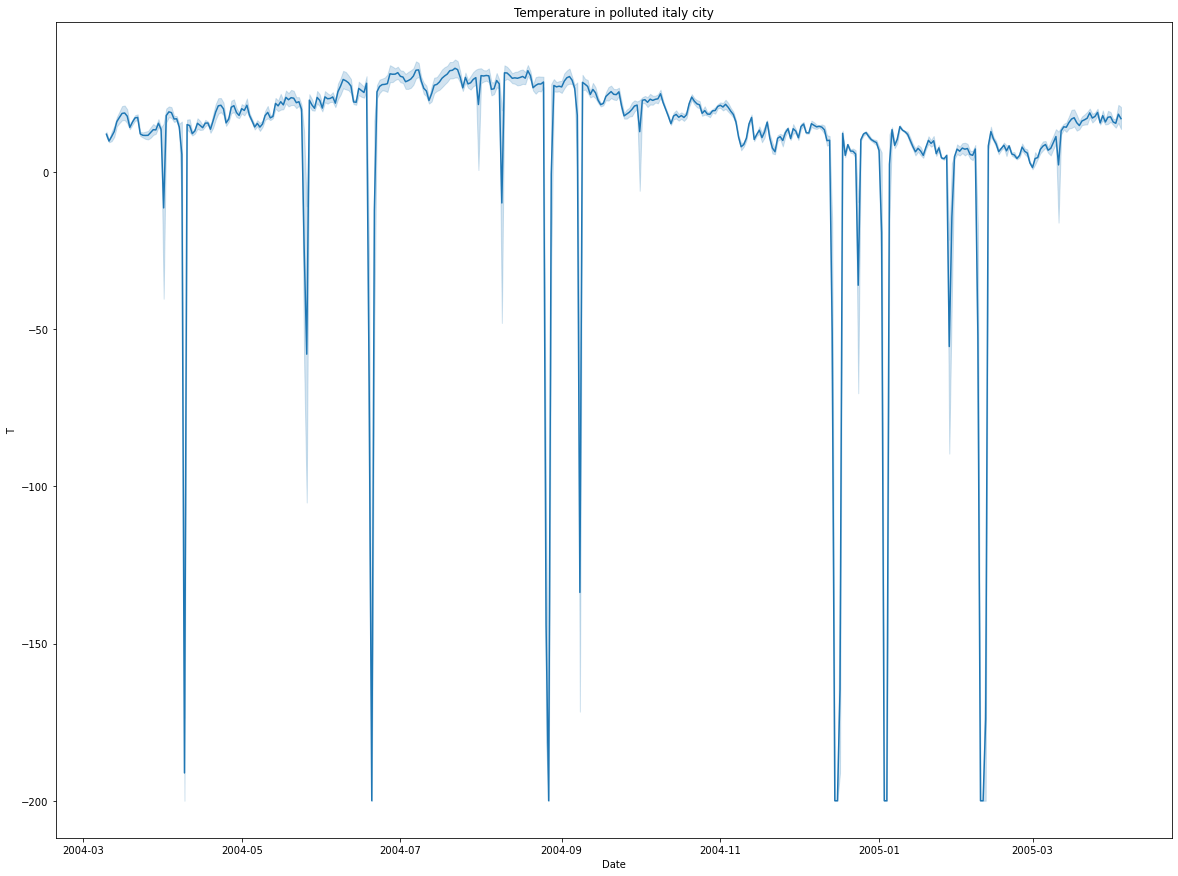

In [6]:
plt.figure(figsize = (20,15))
plt.title("Temperature in polluted italy city")
sns.lineplot(x = "Date", y = "T",
             data = df_air)

In [7]:
value_remove = [-200]

In [8]:
# removing all -200 values
df_air = df_air.applymap(lambda x: np.nan if x in value_remove else x)

In [9]:
df_air.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [10]:
df_air.iloc[:,2].fillna(df_air.iloc[:,2].mean(), inplace = True)
df_air.iloc[:,3].fillna(df_air.iloc[:,3].mean(), inplace = True)
df_air.iloc[:,5].fillna(df_air.iloc[:,5].mean(), inplace = True)
df_air.iloc[:,6].fillna(df_air.iloc[:,6].mean(), inplace = True)
df_air.iloc[:,7].fillna(df_air.iloc[:,7].mean(), inplace = True)
df_air.iloc[:,8].fillna(df_air.iloc[:,8].mean(), inplace = True)
df_air.iloc[:,9].fillna(df_air.iloc[:,9].mean(), inplace = True)
df_air.iloc[:,10].fillna(df_air.iloc[:,10].mean(), inplace = True)
df_air.iloc[:,11].fillna(df_air.iloc[:,11].mean(), inplace = True)
df_air.iloc[:,12].fillna(df_air.iloc[:,12].mean(), inplace = True)
df_air.iloc[:,13].fillna(df_air.iloc[:,13].mean(), inplace = True)
df_air.iloc[:,14].fillna(df_air.iloc[:,14].mean(), inplace = True)

In [11]:
df_air.isnull().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
Unnamed: 15      9357
Unnamed: 16      9357
dtype: int64

In [12]:
df_air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,914.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,2.152750,1099.707856,218.811816,10.082993,939.029205,246.881252,835.370973,113.075515,1456.143486,1022.780725,18.316054,49.232360,1.025530,NaN,NaN
std,1.316068,212.796116,204.459921,7.302474,261.557856,193.419417,251.741784,43.911095,339.365351,390.609000,8.658396,16.974308,0.395836,NaN,NaN
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679,NaN,NaN
25%,1.200000,941.250000,67.000000,4.591495,742.500000,112.000000,665.500000,85.900000,1241.500000,741.750000,12.025000,36.550000,0.746115,NaN,NaN
50%,2.152750,1074.500000,150.000000,8.593367,923.250000,229.000000,817.500000,113.075515,1456.143486,982.500000,18.275000,49.232360,1.015441,NaN,NaN
75%,2.600000,1221.250000,297.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223,NaN,NaN
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,NaN,NaN


In [13]:
df_air = df_air.drop(["Unnamed: 15", "Unnamed: 16", "NMHC(GT)", "PT08.S2(NMHC)"], axis = 1)

<AxesSubplot:title={'center':'Temperature in polluted italy city'}, xlabel='Date', ylabel='T'>

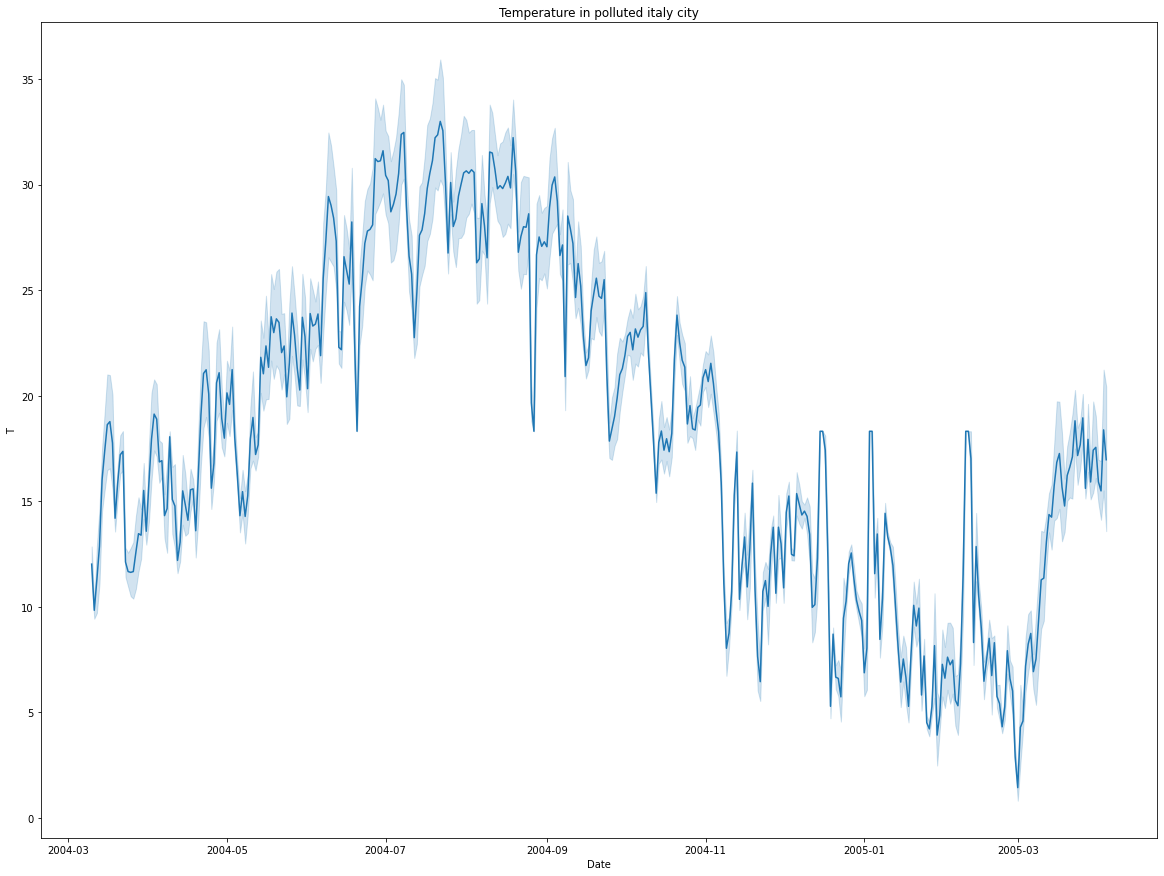

In [14]:
plt.figure(figsize = (20,15))
plt.title("Temperature in polluted italy city")
sns.lineplot(x = "Date", y = "T",
             data = df_air)

<AxesSubplot:title={'center':'Temperature in polluted italy city'}, xlabel='Date', ylabel='CO(GT)'>

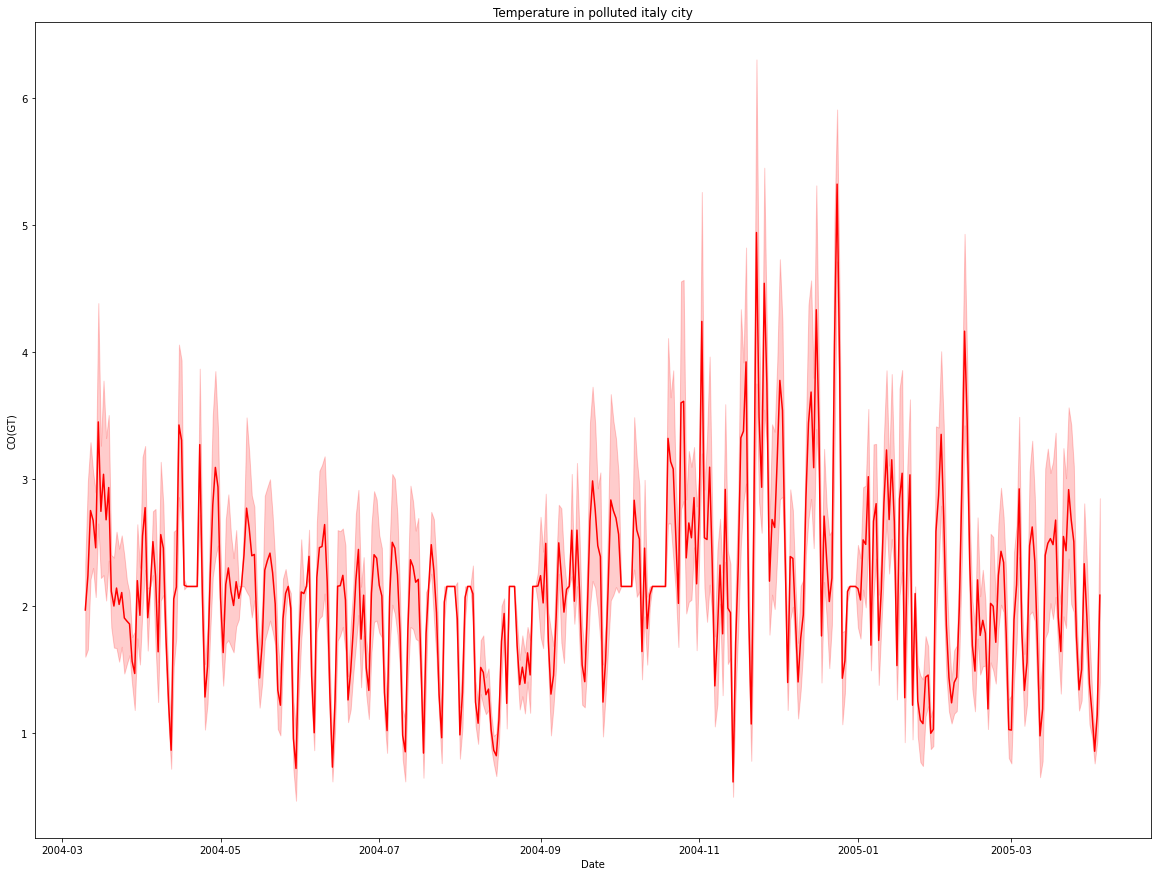

In [15]:
plt.figure(figsize = (20,15))
plt.title("Temperature in polluted italy city")
sns.lineplot(x = "Date", y = "CO(GT)",
             data = df_air, color = "r")

<AxesSubplot:title={'center':'temperature during the day in the city along the time'}, xlabel='Date', ylabel='T'>

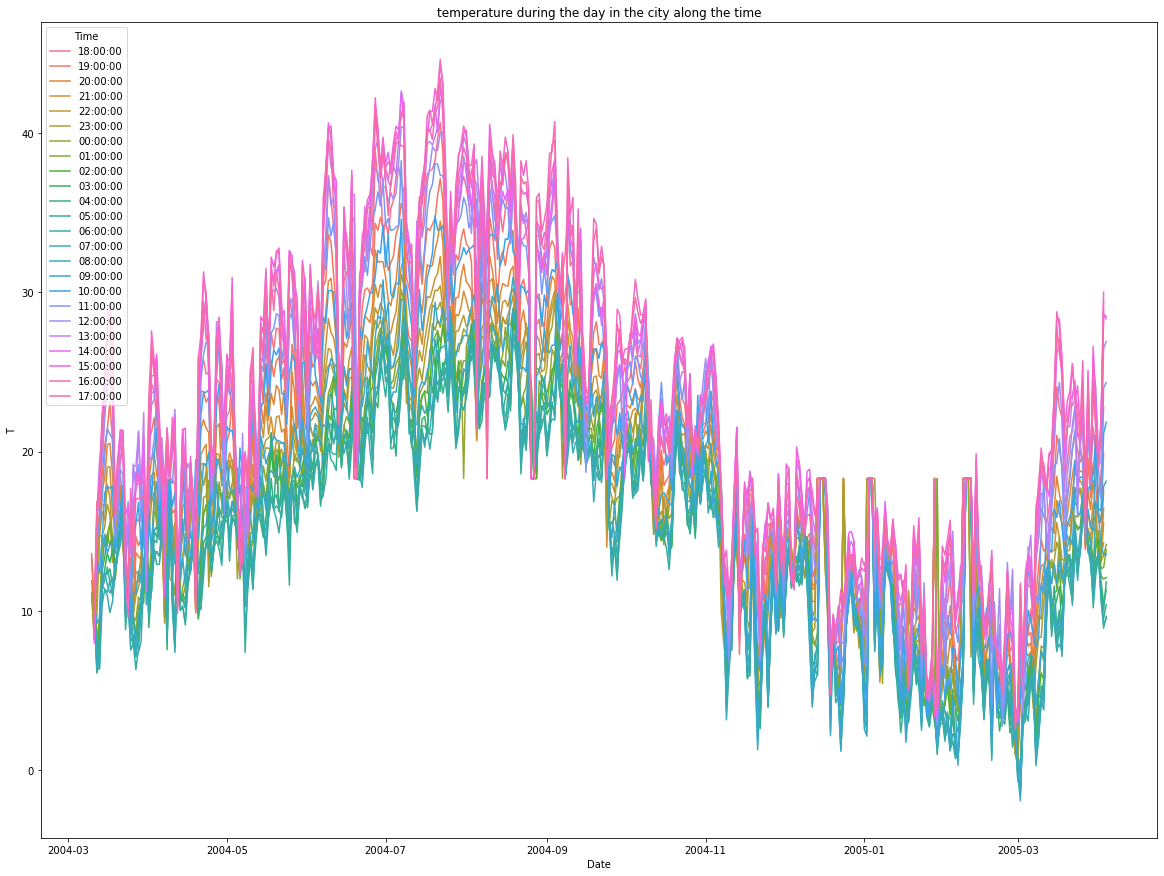

In [16]:
plt.figure(figsize = (20,15))
plt.title("temperature during the day in the city along the time")
sns.lineplot(x = "Date", y = "T", hue = "Time", data = df_air)

<AxesSubplot:title={'center':'relative humidity (%) along the time'}, xlabel='Date', ylabel='RH'>

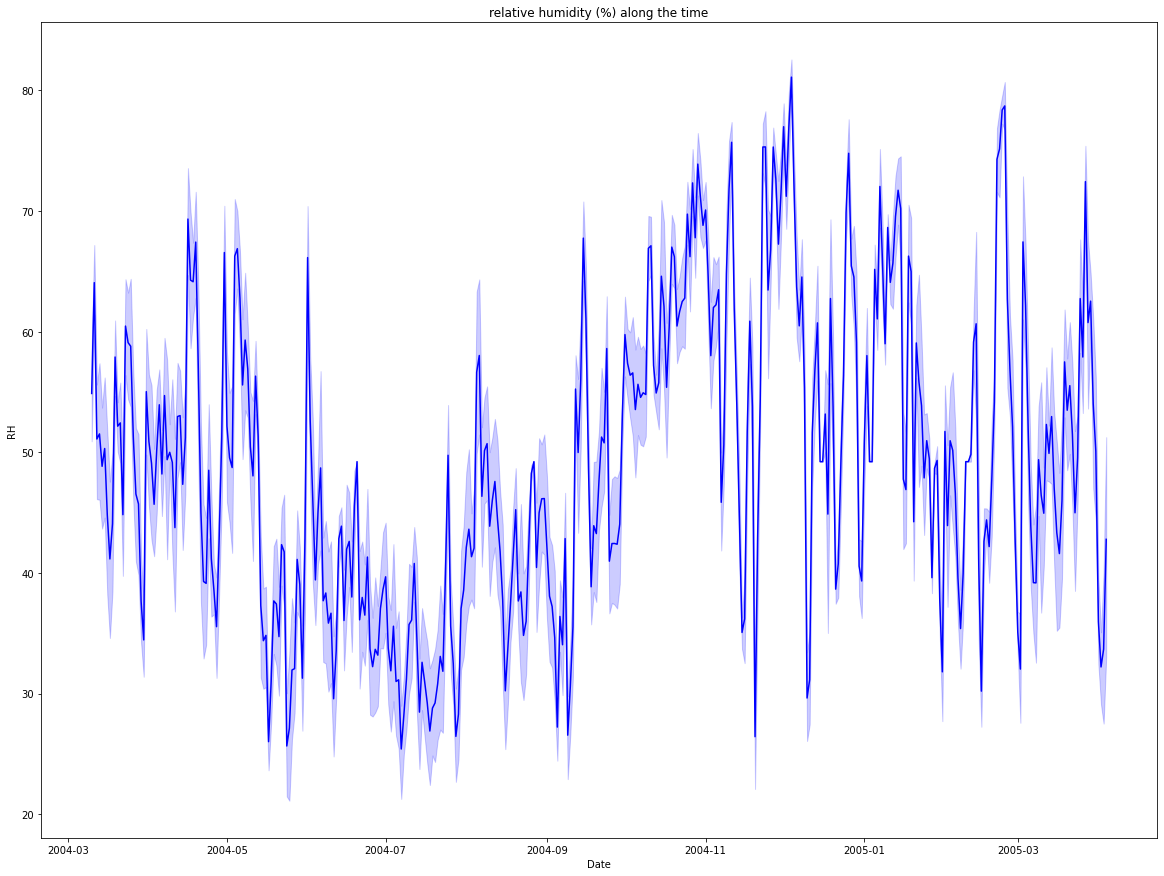

In [17]:
plt.figure(figsize = (20,15))
plt.title("relative humidity (%) along the time")
sns.lineplot(x = "Date", y = "RH", color = "b", data = df_air)

<AxesSubplot:title={'center':'true hourly averaged concentrarion of the 4 oxides in mg/m^3'}, xlabel='Date', ylabel='NO2(GT)'>

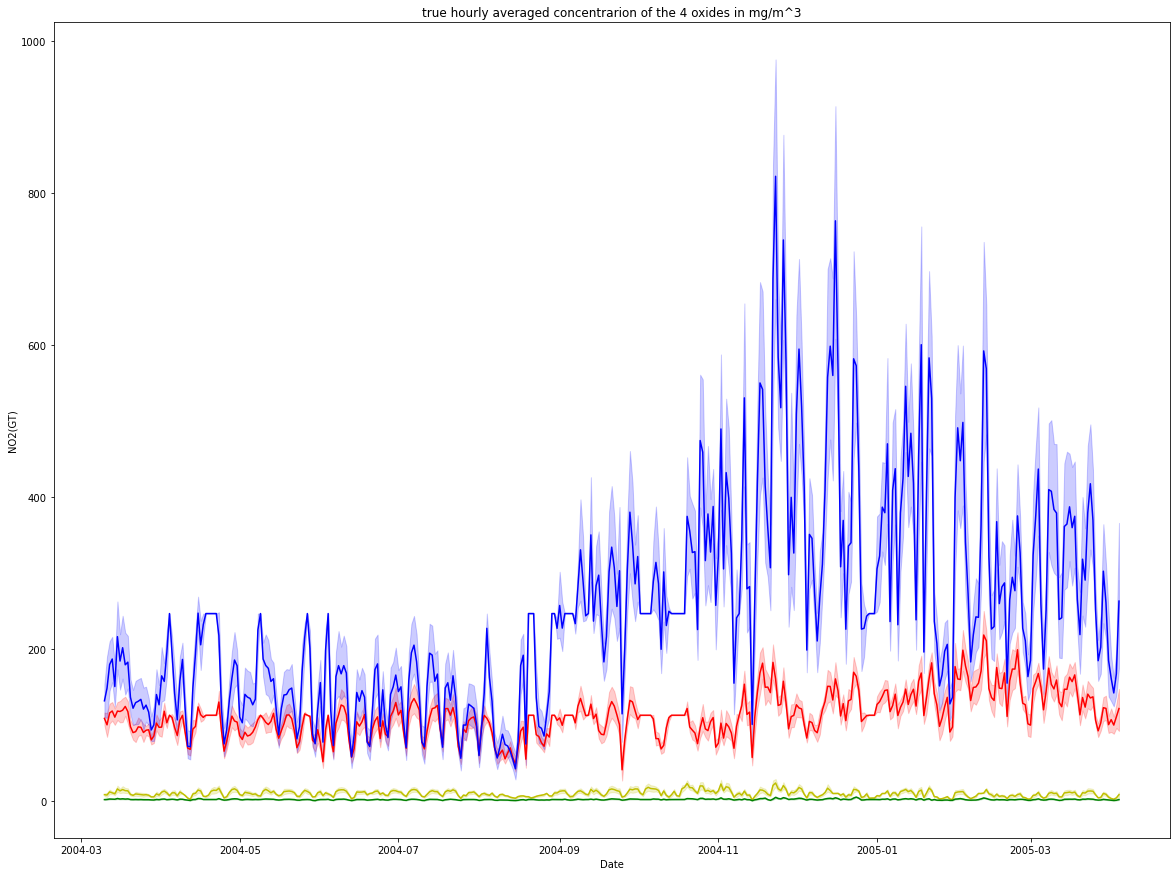

In [18]:
plt.figure(figsize = (20,15))
plt.title("true hourly averaged concentrarion of the 4 oxides in mg/m^3")
sns.lineplot(x = "Date", y = "NO2(GT)", color = "r", data = df_air)
sns.lineplot(x = "Date", y = "NOx(GT)", color = "b", data = df_air)
sns.lineplot(x = "Date", y = "C6H6(GT)", color = "y", data = df_air)
sns.lineplot(x = "Date", y = "CO(GT)", color = "g", data = df_air)

In [19]:
df_air.tail()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,13.529605,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,11.355157,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,12.374538,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,9.547187,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,11.932060,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


<AxesSubplot:title={'center':'hourly averaged sensor response of the 4 oxides'}, xlabel='Date', ylabel='PT08.S1(CO)'>

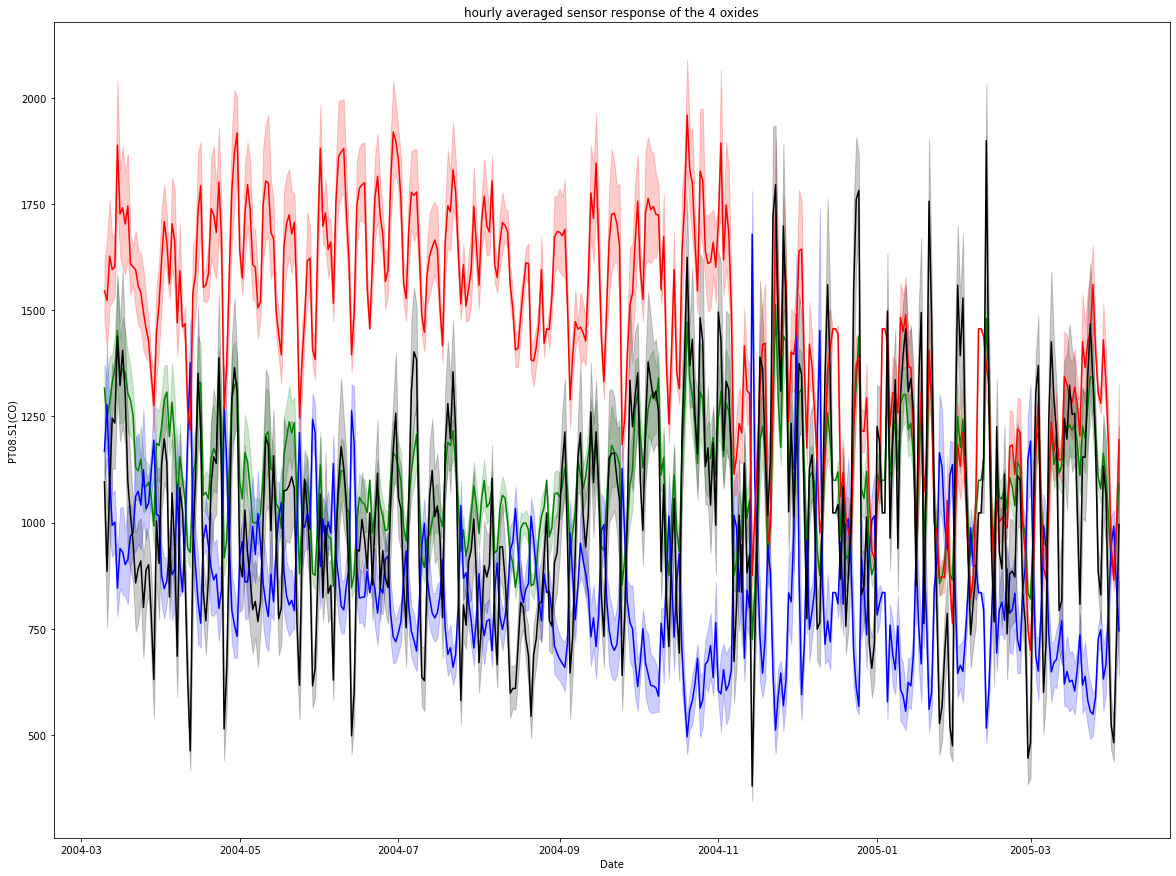

In [20]:
# dont know what the O3 variable is supposed to mean because there is no O3 concentration variable in the 
# dataframe
plt.figure(figsize = (20,15))
plt.title("hourly averaged sensor response of the 4 oxides")
sns.lineplot(x = "Date", y = "PT08.S1(CO)", color = "g", data = df_air)
sns.lineplot(x = "Date", y = "PT08.S3(NOx)", color = "b", data = df_air)
sns.lineplot(x = "Date", y = "PT08.S4(NO2)", color = "r", data = df_air)
sns.lineplot(x = "Date", y = "PT08.S5(O3)", color = "black", data = df_air)

<AxesSubplot:>

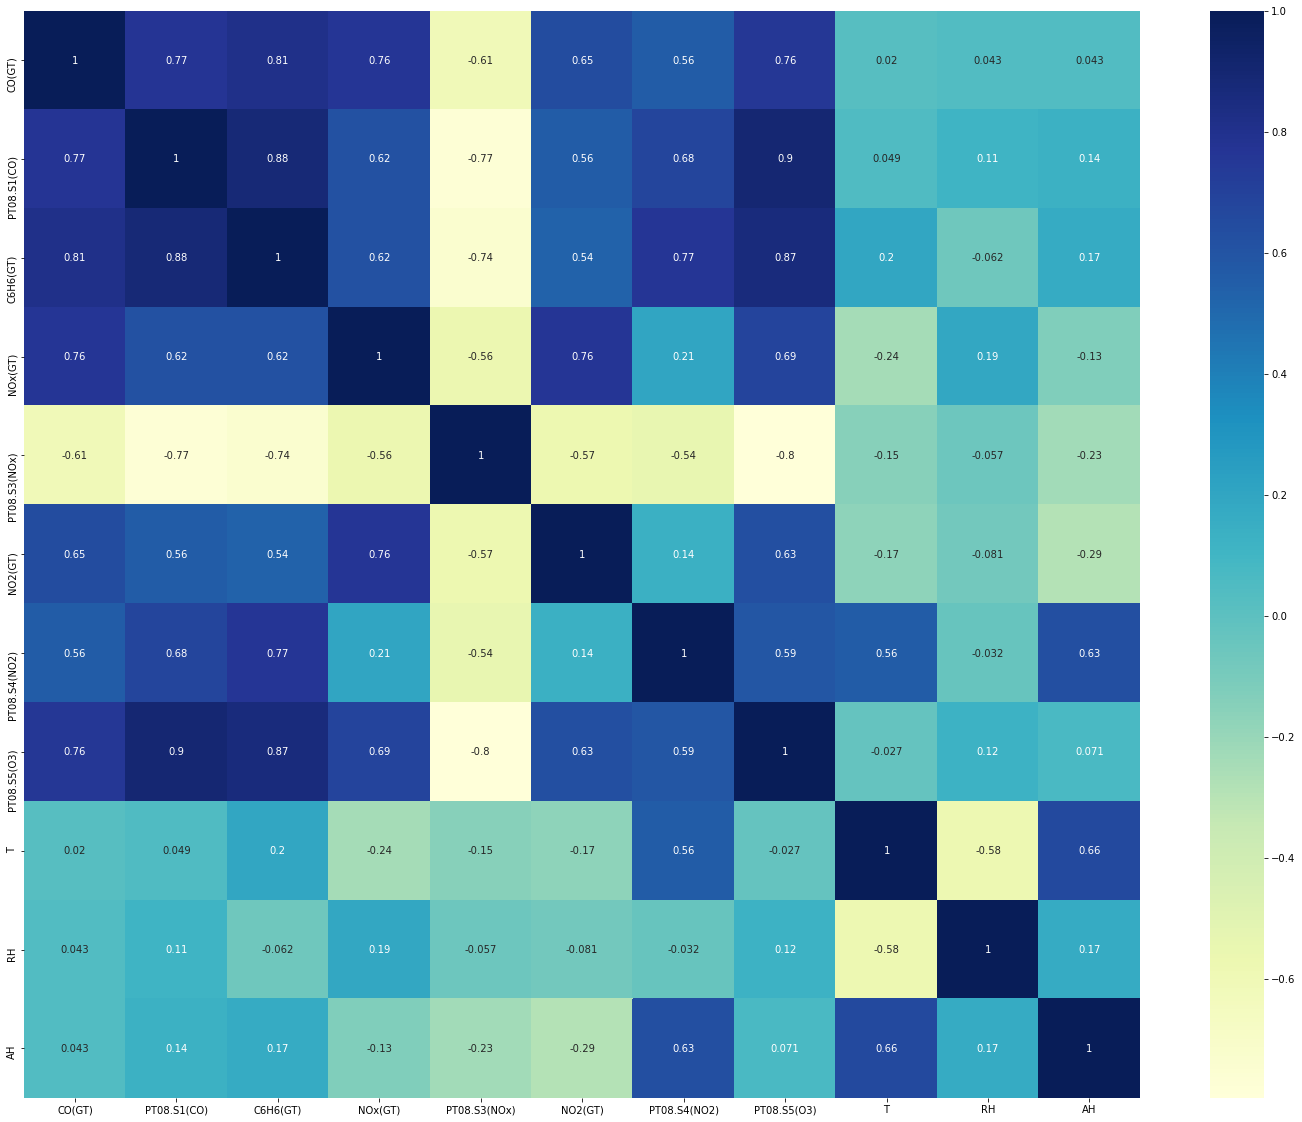

In [21]:
plt.figure(figsize = (25,20))
sns.heatmap(df_air.corr(), cmap = "YlGnBu", annot = True)

In [22]:
df_air2 = df_air.iloc[:,2].mean()
df_air2

2.152749543914531

In [23]:
df_air2 = df_air.iloc[:,4].mean()
df_air2

10.082993455078856

In [24]:
df_air2 = df_air.iloc[:,5].mean()
df_air2

246.88125161958985

In [25]:
df_air2 = df_air.iloc[:,7].mean()
df_air2

113.07551523007105

In [26]:
names = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
data = [2.152, 10.08, 246.8, 113.07]

([<matplotlib.patches.Wedge at 0x1e0f4bbe880>,
 [Text(1.0998184438605718, 0.019984757794641997, 'CO(GT)'),
  Text(1.0918985288599306, 0.13325765521544966, 'C6H6(GT)'),
  Text(-0.7248586496356141, 0.8273934602403105, 'NOx(GT)'),
  Text(0.6357012060671716, -0.8977104079850827, 'NO2(GT)')],
 [Text(0.5999009693784936, 0.010900776978895634, '0.6%'),
  Text(0.5955810157417802, 0.07268599375388161, '2.7%'),
  Text(-0.39537744525578944, 0.45130552376744204, '66.3%'),
  Text(0.34674611240027536, -0.4896602225373178, '30.4%')])

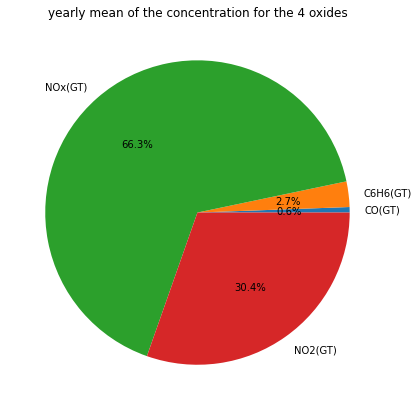

In [27]:
fig = plt.figure(figsize = (10, 7))
plt.title("yearly mean of the concentration for the 4 oxides")
plt.pie(data, labels = names, autopct = "%.1f%%")

In [28]:
df_air.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,11.881723,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,9.397165,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,8.997817,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,9.228796,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,6.518224,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [29]:
# pre processing data for machine learning

In [30]:
df_air = df_air.drop(["Date", "Time"], axis = 1)

In [31]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO(GT)        9357 non-null   float64
 1   PT08.S1(CO)   9357 non-null   float64
 2   C6H6(GT)      9357 non-null   float64
 3   NOx(GT)       9357 non-null   float64
 4   PT08.S3(NOx)  9357 non-null   float64
 5   NO2(GT)       9357 non-null   float64
 6   PT08.S4(NO2)  9357 non-null   float64
 7   PT08.S5(O3)   9357 non-null   float64
 8   T             9357 non-null   float64
 9   RH            9357 non-null   float64
 10  AH            9357 non-null   float64
dtypes: float64(11)
memory usage: 804.2 KB


In [32]:
X = df_air.drop("T", axis = 1)
y = df_air['T'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [34]:
# machine learning model

In [35]:
modelo = LinearRegression(normalize = False, fit_intercept = True)

In [36]:
modelo_v2 = modelo.fit(X_train, y_train)

In [37]:
score = r2_score(y_test, modelo_v2.fit(X_train, y_train).predict(X_test))
score

0.9296590172512468